In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Build-With-Ai\Week-1\AQI_Data.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
df.shape

(1093, 9)

<Axes: >

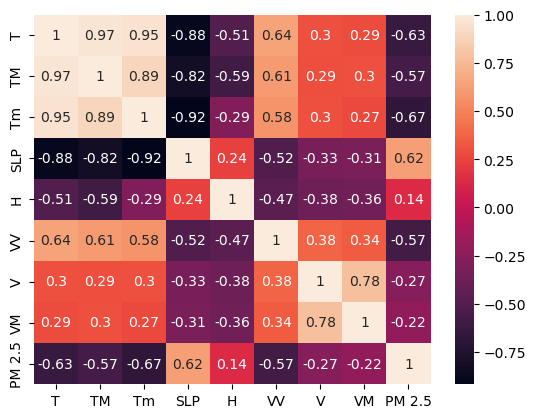

In [4]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [5]:
data = df.copy()

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_to_pca = ['T', 'TM', 'Tm']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[cols_to_pca])

pca = PCA(n_components=1)
data['T_PCA'] = pca.fit_transform(scaled_data)

data.drop(columns=cols_to_pca, inplace=True)

print(f"Explained Variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")

Explained Variance by PC1: 0.96


<Axes: >

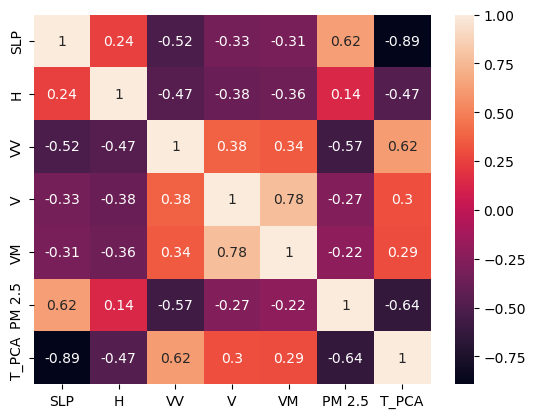

In [7]:
sns.heatmap(data.corr(), annot = True)

In [8]:
cols_to_pca = ['V', 'VM']
scaled_data = scaler.fit_transform(data[cols_to_pca])

pca = PCA(n_components=1)
data['V_PCA'] = pca.fit_transform(scaled_data)

data.drop(columns=cols_to_pca, inplace=True)

print(f"Explained Variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")

Explained Variance by PC1: 0.89


<Axes: >

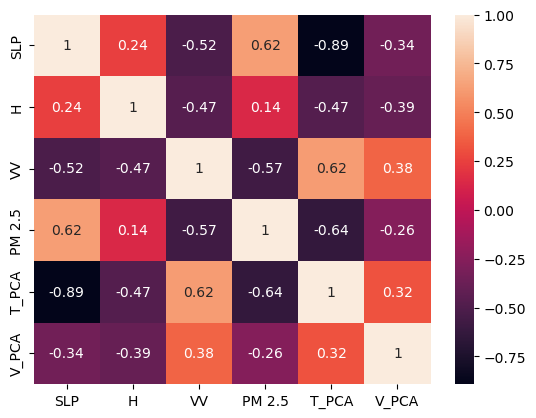

In [9]:
sns.heatmap(data.corr(), annot = True)

In [10]:
data.head()

,SLP,H,VV,PM 2.5,T_PCA,V_PCA
0,1017.6,93.0,0.5,219.720833,-4.585909,-1.071493
1,1018.5,87.0,0.6,182.187500,-4.334798,-0.888522
2,1019.4,82.0,0.6,154.037500,-4.517439,-0.814853
3,1018.7,72.0,0.8,223.208333,-4.113632,0.712481
4,1017.3,61.0,1.3,200.645833,-3.256593,0.977859


In [11]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [13]:
data_scaled.head()

,SLP,H,VV,PM 2.5,T_PCA,V_PCA
0,1.264733,1.915694,-2.011660,1.310359,-2.704211,-0.804086
1,1.384321,1.533592,-1.877826,0.865794,-2.556136,-0.666778
2,1.503910,1.215174,-1.877826,0.532371,-2.663835,-0.611495
3,1.410897,0.578338,-1.610160,1.351667,-2.425719,0.534671
4,1.224870,-0.122182,-0.940995,1.084425,-1.920342,0.733820


In [15]:
data_scaled.isnull().sum()

SLP       0
H         0
VV        0
PM 2.5    1
T_PCA     0
V_PCA     0
dtype: int64

In [16]:
data_scaled.dropna(inplace = True)

In [33]:
data_new = data_scaled.drop('T_PCA', axis = 1)

<Axes: >

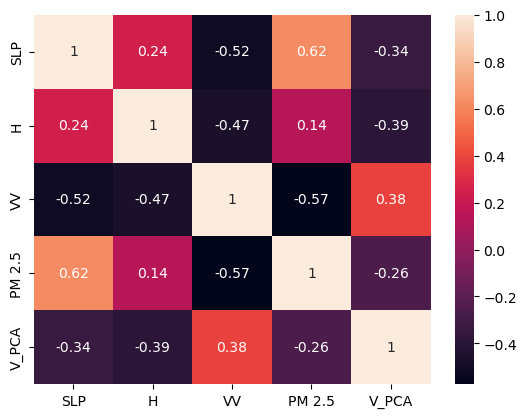

In [36]:
sns.heatmap(data_new.corr(), annot = True)

In [25]:
df.dropna(inplace = True)

In [30]:
data.dropna(inplace = True)

In [34]:
from sklearn.model_selection import train_test_split

X = data_new.drop("PM 2.5", axis = 1)
y = data_new["PM 2.5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
import optuna
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(f"Best hyperparameters: {study.best_params}")

best_params = study.best_params
best_model = LinearRegression(fit_intercept=best_params['fit_intercept'])
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae_best}")
print(f"Mean Squared Error: {mse_best}")
print(f"Root Mean Squared Error: {rmse_best}")
print(f"R-squared: {r2_best}")

[I 2025-02-06 01:37:54,488] A new study created in memory with name: no-name-965b2ab0-0d66-46b7-aa2b-33a49b7c037b
[I 2025-02-06 01:37:54,501] Trial 0 finished with value: 0.5116968626883778 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.5116968626883778.
[I 2025-02-06 01:37:54,513] Trial 1 finished with value: 0.5116968626883778 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.5116968626883778.
[I 2025-02-06 01:37:54,560] Trial 2 finished with value: 0.5116968626883778 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.5116968626883778.
[I 2025-02-06 01:37:54,608] Trial 3 finished with value: 0.5116968626883778 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.5116968626883778.
[I 2025-02-06 01:37:54,628] Trial 4 finished with value: 0.5124702402586084 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.5116968626883778.
[I 2025-02-06 01:37:54,637] Trial 5 finished with value: 

Best hyperparameters: {'fit_intercept': False}
Mean Absolute Error: 0.5116968626883778
Mean Squared Error: 0.4713996572042724
Root Mean Squared Error: 0.6865855061128747
R-squared: 0.4601935459619326


In [38]:
import optuna
from sklearn.linear_model import SGDRegressor

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-2)
    
    model = SGDRegressor(alpha=alpha, learning_rate=learning_rate, max_iter=max_iter, tol=tol)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(f"Best hyperparameters: {study.best_params}")

best_params = study.best_params
best_model = SGDRegressor(alpha=best_params['alpha'], 
                          learning_rate=best_params['learning_rate'], 
                          max_iter=best_params['max_iter'], 
                          tol=best_params['tol'])
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae_best}")
print(f"Mean Squared Error: {mse_best}")
print(f"Root Mean Squared Error: {rmse_best}")
print(f"R-squared: {r2_best}")

[I 2025-02-06 01:39:32,155] A new study created in memory with name: no-name-05960b84-63e0-4fe4-80bf-72b78fe00979
C:\Users\Akshat\AppData\Local\Temp\ipykernel_15152\1828347032.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_15152\1828347032.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform('tol', 1e-5, 1e-2)
[I 2025-02-06 01:39:32,186] Trial 0 finished with value: 0.512196380825051 and parameters: {'alpha': 0.003820345164476079, 'learning_rate': 'adaptive', 'max_iter': 515, 'tol': 0.0019926669121491576}. Best is trial 0 with value: 0.51

Best hyperparameters: {'alpha': 4.588004744762238e-05, 'learning_rate': 'constant', 'max_iter': 786, 'tol': 3.170217708108177e-05}
Mean Absolute Error: 0.5193944762956915
Mean Squared Error: 0.48769481341152965
Root Mean Squared Error: 0.6983514970353609
R-squared: 0.4415337307588336
